# belosgraficos instagram.com/belosgraficos/

Notebook para a criação de gráficos verificando se a emissão de gases poluentes possui correlação com a população de cada país utilizando os dados do Our World in Data

Comentários estão em português - Comments are in Portuguese

### Notebook criado utilizando o Kaggle
Dados: https://ourworldindata.org/co2-and-other-greenhouse-gas-emissions  
https://ourworldindata.org/world-population-growth#population-growth-rate-by-country-and-region

Importando as bibliotecas necessárias para a execução do código

In [1]:
library(dplyr)
library(ggplot2)
library(png)
library(ggthemes)
library(tidyr)
library(readr)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Lendo os dados

In [2]:
emissoes_2019 <- read.csv('../input/populacao-vs-emissoes/emissoes.csv', sep = ';')
populacao_2019 <- read.csv('../input/populacao-vs-emissoes/populacao.csv', sep = ';')

head(emissoes_2019)
head(populacao_2019)

,Country,Emissions
,<fct>,<dbl>
1,China,1.0170e+10
2,United States,5.2800e+09
3,India,2.6200e+09
4,Russia,1.6800e+09
5,Japan,1.1100e+09
6,Iran,7.7953e+08


,Country,Population
,<fct>,<int>
1,China,1430000000
2,India,1370000000
3,United States,329060000
4,Indonesia,270630000
5,Pakistan,216560000
6,Brazil,211050000


Criando gráficos dos países mais populosos

In [3]:
populacao <- populacao_2019 %>%
                top_n(10,Population)

populacao

Country,Population
<fct>,<int>
China,1430000000
India,1370000000
United States,329060000
Indonesia,270630000
Pakistan,216560000
Brazil,211050000
Nigeria,200960000
Bangladesh,163050000
Russia,145870000


Criando o gráfico

Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


png 
  2

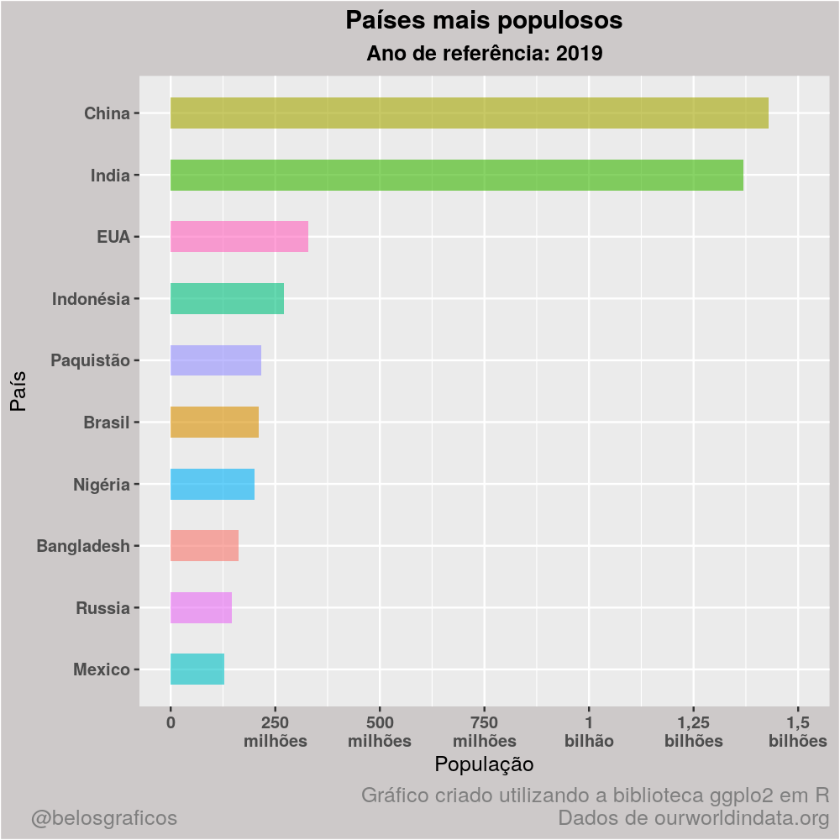

In [4]:
# Definindo um nome e tamanho para a figura a ser criada
fig_name = "populacao_2019.png"
fig_width = 1000
fig_height = 1000

# Cria uma figura em branco com os parâmetros anteriores
png(fig_name, width = fig_width, height = fig_height)

# Criando o gráfico: e informando os dados que iremos utilizar
ggplot(populacao, aes(x = reorder(Country, Population), 
                      y = Population,
                      fill = Country,
                      palette = 'Paired')) +

# Adicionando camada: Colplot
geom_col(alpha = 0.6, width = 0.5) + 

# Deixando as colunas na horizontal
coord_flip() + 

# Definindo o tema
theme_grey(base_size = 25) +
theme(legend.position = "", # Remove a legenda
        
      # Título dos eixos em negrito
      axis.text.x = element_text(face = "bold"), 
      axis.text.y = element_text(face = "bold"),
        
      # Título e subtitulo do gráfico centralizados e em negrito
      plot.title = element_text(hjust = 0.5, face = "bold"),
      plot.subtitle = element_text(hjust = 0.5, face = "bold"),
        
      # Cores de fundo da figura e da área do gráfico
      plot.background = element_rect(fill = "snow3"),
                
      # Definição da nota de rodapé, utilizando vetores para configurar todas as notas
      plot.caption = element_text(color = 'gray50', hjust = c(-0.2,1), size = 25)) +

# Definição dos nomes no eixo Y
scale_x_discrete(labels = c("Mexico", "Russia",
                            "Bangladesh", "Nigéria",
                            "Brasil", "Paquistão",
                            "Indonésia", "EUA",
                            "India", "China")) +

# Definição dos nomes no eixo X
scale_y_continuous(breaks = seq(0, 1500000000, by = 250000000), 
                   limits = c(0,1500000000),
                   labels = c('0', '250\nmilhões', '500\nmilhões', '750\nmilhões', '1\nbilhão', '1,25\nbilhões', '1,5\nbilhões'),) +

# Definição dos labels
labs(x = "País", 
     y = "População", 
     title = "Países mais populosos",
     subtitle = "Ano de referência: 2019",
     caption = c("\n@belosgraficos","Gráfico criado utilizando a biblioteca ggplo2 em R\nDados de ourworldindata.org"))
  

# Salva a figura
dev.off()
img <- readPNG(fig_name)
grid::grid.raster(img)



Criando gráficos dos países que mais emitiram poluentes

In [5]:
emissoes <- emissoes_2019 %>%
                top_n(10,Emissions)

emissoes

Country,Emissions
<fct>,<dbl>
China,1.0170e+10
United States,5.2800e+09
India,2.6200e+09
Russia,1.6800e+09
Japan,1.1100e+09
Iran,7.7953e+08
Germany,7.0196e+08
Indonesia,6.1751e+08
South Korea,6.1126e+08


Criando o gráfico

Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


png 
  2

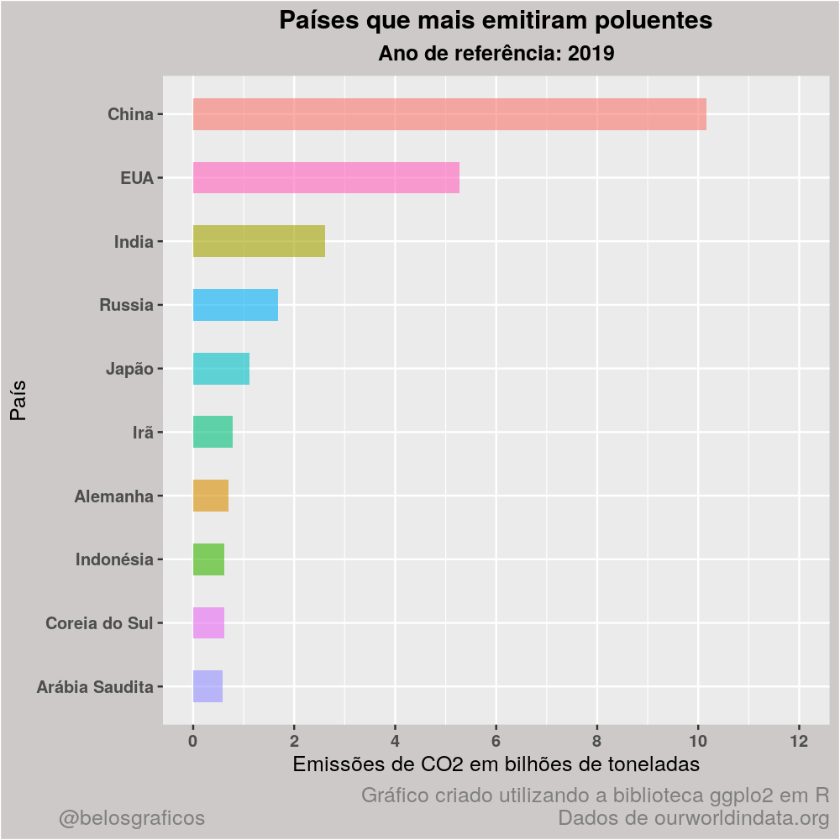

In [6]:
# Definindo um nome e tamanho para a figura a ser criada
fig_name = "poluentes_2019.png"
fig_width = 1000
fig_height = 1000

# Cria uma figura em branco com os parâmetros anteriores
png(fig_name, width = fig_width, height = fig_height)

# Criando o gráfico: e informando os dados que iremos utilizar
ggplot(emissoes, aes(x = reorder(Country, Emissions), 
                     y = Emissions,
                     fill = Country,
                     palette = 'Paired')) +

# Adicionando camada: Colplot
geom_col(alpha = 0.6, width = 0.5) + 

# Deixando as colunas na horizontal
coord_flip() + 

# Definindo o tema
theme_grey(base_size = 25) +
theme(legend.position = "", # Remove a legenda
        
      # Título dos eixos em negrito
      axis.text.x = element_text(face = "bold"), 
      axis.text.y = element_text(face = "bold"),
        
      # Título e subtitulo do gráfico centralizados e em negrito
      plot.title = element_text(hjust = 0.5, face = "bold"),
      plot.subtitle = element_text(hjust = 0.5, face = "bold"),
        
      # Cores de fundo da figura e da área do gráfico
      plot.background = element_rect(fill = "snow3"),
                
      # Definição da nota de rodapé, utilizando vetores para configurar todas as notas
      plot.caption = element_text(color = 'gray50', hjust = c(-0.2,1), size = 25)) +

# Definição dos nomes no eixo Y
scale_x_discrete(labels = c("Arábia Saudita", "Coreia do Sul",
                            "Indonésia", "Alemanha",
                            "Irã", "Japão",
                            "Russia", "India",
                            "EUA", "China")) +

# Definição dos nomes no eixo X
scale_y_continuous(breaks = seq(0, 12000000000, by = 2000000000), 
                   limits = c(0,12000000000),
                   labels = c('0','2','4','6','8','10','12')) +



# Definição dos labels
labs(x = "País", 
     y = "Emissões de CO2 em bilhões de toneladas", 
     title = "Países que mais emitiram poluentes",
     subtitle = "Ano de referência: 2019",
     caption = c("\n@belosgraficos","Gráfico criado utilizando a biblioteca ggplo2 em R\nDados de ourworldindata.org"))
  

# Salva a figura
dev.off()
img <- readPNG(fig_name)
grid::grid.raster(img)

## Verificando se a população influencia na quantidade de poluentes

Com todos os países

In [7]:
# Unindo os dois datasets
dataset <- populacao_2019 %>%
             inner_join(emissoes_2019, by = 'Country')

# Verificando os dados
head(dataset)

,Country,Population,Emissions
,<fct>,<int>,<dbl>
1,China,1430000000,1.0170e+10
2,India,1370000000,2.6200e+09
3,United States,329060000,5.2800e+09
4,Indonesia,270630000,6.1751e+08
5,Pakistan,216560000,2.4884e+08
6,Brazil,211050000,4.6572e+08


Criando o gráfico

Loading required package: scales


Attaching package: ‘scales’


The following object is masked from ‘package:readr’:

    col_factor


Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


png 
  2

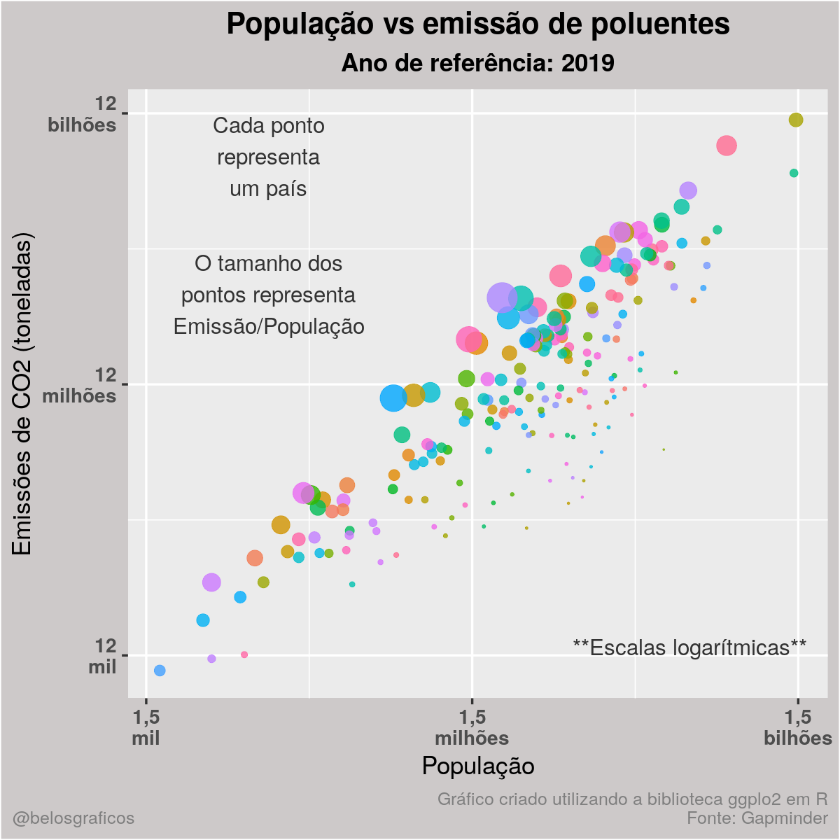

In [8]:
# Definindo um nome e tamanho para a figura a ser criada
fig_name = "populacao_vs_emissao.png"
fig_width = 1200
fig_height = 1200

require(scales)

# Cria uma figura em branco com os parâmetros anteriores
png(fig_name, width = fig_width, height = fig_height)

# Criando o gráfico: e informando os dados que iremos utilizar
ggplot(dataset, aes(x = Population,
                    y = Emissions,
                    color = Country,
                    size = Emissions/Population)) +
  
# Adicionando camada: Boxplot
geom_point(alpha = 0.8) + 

# Aumentando a escala
scale_size(range = c(1, 20)) +

# Configurações do eixo X
scale_x_log10(breaks = c(1500, 1500000, 1500000000),
              labels = c('1,5\nmil', '1,5\nmilhões', '1,5\nbilhões')) +


# Configurações do eixo Y
scale_y_log10(breaks = c(12000, 12000000, 12000000000),
              labels = c('12\nmil', '12\nmilhões', '12\nbilhões')) +


# Definindo o tema
theme_gray(base_size = 35) +  
theme(legend.position = "", # Remove a legenda
      # Título dos eixos em negrito
      axis.text.x = element_text(face = "bold"), 
      axis.text.y = element_text(face = "bold"),
        
      # Título e subtitulo do gráfico centralizados e em negrito
      plot.title = element_text(hjust = 0.5, face = "bold"),
      plot.subtitle = element_text(hjust = 0.5, face = "bold"),
        
      # Cores de fundo da figura e da área do gráfico
      plot.background = element_rect(fill = "snow3"),
                
      # Definição da nota de rodapé, utilizando vetores para configurar todas as notas
      plot.caption = element_text(color = 'gray50', hjust = c(-0.2,1), size = 25)) +

# Definindo os labels
labs(x = "População",
     y = "Emissões de CO2 (toneladas)", 
     title = "População vs emissão de poluentes",
     subtitle = "Ano de referência: 2019",
     caption = c("\n@belosgraficos","Gráfico criado utilizando a biblioteca ggplo2 em R\nFonte: Gapminder")) + 


annotate("text",
         x = 20000, 
         y = 11000000000,
         label = 'Cada ponto\nrepresenta\num país',
         hjust = 0.5, vjust = 1, size = 11, color = 'gray20') +

annotate("text",
         x = 20000, 
         y = 120000000,
         label = 'O tamanho dos\npontos representa\nEmissão/População',
         hjust = 0.5, vjust = 0.5, size = 11, color = 'gray20') +

annotate("text",
         x = 150000000, 
         y = 12000,
         label = '**Escalas logarítmicas**',
         hjust = 0.5, vjust = 0, size = 11, color = 'gray20')

# Salva a figura
dev.off()
img <- readPNG(fig_name)
grid::grid.raster(img)